<a href="https://colab.research.google.com/github/ashiqur0421/CMSC320_Group_Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The Titanic sinking is one of the most historically significant disasters with over 1,500 passengers losing their lives on April 15, 1912. The Titanic dataset has been studied to understand how different factors influence the survivability of passengers. The dataset contains a lot of numerical and categorical information about each passenger, making it a great dataset for analysis.

The goal of this project is to use machine learning techniques and train a Logistic Regression model to explore how different factors affected a passenger's chances of survival. Specifically, we want to answer the following questions:

1.   What features (age, gender, passenger class, etc.) correlate most strongly with survival?

      *   How does class, gender, and age affect survival?
      *   Are there statistically significant differences in survival rates between 1st class vs. 3rd class, men vs. women, and children vs. adults?

2.   Can we build a machine learning model to accurately predict whether a passenger survived based on their attributes?
3.   How do precision, recall, and accuracy change as we vary the survival prediction cutoff?
4.   How do the machine learning derived features' importance compare to our statistical findings?

Understanding which passenger features correlate most strongly with survival on the Titanic is important because it allows us to verify historical narratives. For example, many of us have heard that women and children were given priority during evacuation, and we can verify this with statistical evidence from the dataset. Additionally, by identifying which features were most correlated with survival, we can better understand how social inequality, cabin class distribution, and other patterns shaped outcomes during this disaster.

Evaluating whether our LR model can accurately predict survival is equally important because it demonstrates how well modern algorithms can learn from real data and highlights the challenges of classification when features are correlated or partially missing. This analysis strengthens our understanding of machine learning.

Analyzing the precision, recall, and accuracy shows us the trade-offs our model has to make, and understanding this helps us choose the best cut-off for our case. Comparing machine learning features' importance with our statistical findings is also important because it tells us if different methods agree on which factors matter most and helps us understand how the model makes decisions.

Together, these questions form a comprehensive exploration into the Titanic dataset by combining statistical inference, machine learning algorithms, and interpretability.

# Data Curation

Source:  https://www.kaggle.com/datasets/yasserh/titanic-dataset

The dataset contains passenger survival data of the Titanic, along with their identification (name and ticket number), and various factors that might have an effect on their survivability. These include their gender, age, relatives (who were aboard with them), their class (1st class, 2nd, or 3rd class), the fare rate they had to pay, and where they got on the ship from (Embarked).
By doing the following exploratory analysis on the dataset, the relationships between passenger survivability and these factors were tested to see if any or all of them may have affected or even caused a passenger's survivability.

# Exploratory Data Analysis

The Titanic dataset contains 891 entries and 12 features.

Based on `titanic_df.info()`, the `Age` and `Cabin` columns are missing some values.

There are no duplicate rows as indicated by `titanic_df.duplicated().sum()` being equal to zero.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
#titanic_df = pd.read_csv("Titanic-Dataset.csv")
titanic_df = pd.read_csv("https://raw.githubusercontent.com/ashiqur0421/CMSC320_Group_Project/refs/heads/main/Titanic-Dataset.csv")
print("Dataframe:")
display(titanic_df)
print("Info:")
display(titanic_df.info())

Dataframe:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [60]:
print("Duplicated:")
print(titanic_df.duplicated())
print(f"Number of duplicated values: {titanic_df.duplicated().sum()}")
print("\nDescribe:")
display(titanic_df.describe())

Duplicated:
0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool
Number of duplicated values: 0

Describe:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We will not be using the `PassengerID` or `Name` columns, as we believe them to be largely irrelevant to the survival of a passenger; the `Cabin` column, due to its incredibly sparse nature (the vast majority of its values are `NaN`); nor the `Ticket` column (representing the ticket number of each passenger), because its values are largely incomprehensible, and we have many other features to work with already.

Below are some hypothesis tests we performed in the process of exploring our data. For all hypothesis testing, we chose a significance level of $\alpha = 0.05$.

## Survival vs. Passenger Class

In [61]:
contingency_table = pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])
chi2_class, p_class, dof_class, _ = stats.chi2_contingency(contingency_table)
print(contingency_table)
print(f"Chi-square: {chi2_class:.4g}  p-value: {p_class:.4g}")

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Chi-square: 102.9  p-value: 4.549e-23


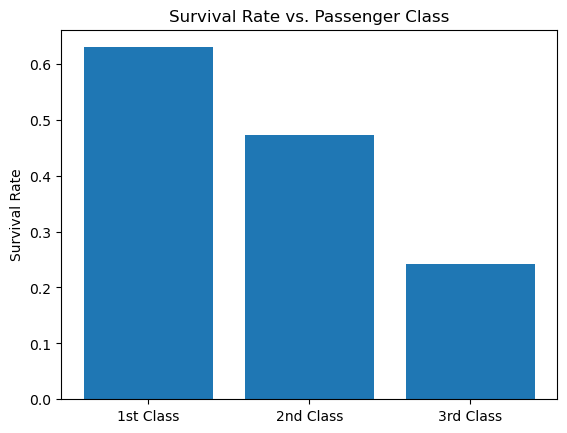

In [62]:
survive_rate_class = contingency_table[1] / contingency_table.sum(axis=1)
x_values = ["1st Class", "2nd Class", "3rd Class"]
survival = survive_rate_class.values
plt.bar(x_values, survival)
plt.title("Survival Rate vs. Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

From the contigency table, we see that there is a statistically significant relationship between passenger class and survival outcome. There appears to be an association between passenger class and whether a passenger survived the Titanic. First class passengers were much more likely to survive, and this makes logical sense because they had better access to lifeboats and were given priority. The p-value is less than 0.05, meaning we reject the null hypothesis and conclude that passenger class is strongly associated with survival on the Titanic.

In [63]:
survival_num = contingency_table[1]
total_counts = contingency_table.sum(axis=1)
comparisons = [(1, 2),(1, 3), (2, 3)]
print("Pairwise Z-tests for survival differences between passenger classes:\n")
for i, j in comparisons:
  print("Class "f"{i} vs. Class "f"{j}:")
  survival_btwn_classes = [survival_num[i], survival_num[j]]
  total = [total_counts[i], total_counts[j]]
  z, p = proportions_ztest(survival_btwn_classes, total)
  print(f"Z = {z:.4g}, p-value = {p:.4g}")

Pairwise Z-tests for survival differences between passenger classes:

Class 1 vs. Class 2:
Z = 3.147, p-value = 0.00165
Class 1 vs. Class 3:
Z = 9.878, p-value = 5.21e-23
Class 2 vs. Class 3:
Z = 5.79, p-value = 7.036e-09


All of the p-values are far below 0.05, so we reject the null hypothesis for all comparisons of the passenger classes. So, each difference in survival between the classes (first vs. second, first vs. third, and second vs. third) is statistically significant. So, passenger class was a major factor that influenced survival.

## Survival vs. Passenger Fare

In [64]:
fare_survived = titanic_df[titanic_df['Survived'] == 1]['Fare']
fare_died = titanic_df[titanic_df['Survived'] == 0]['Fare']

# displaying summary statistics for both group
print("----- Survived ----- ")
print(fare_survived.describe())
print("\n\n----- Not Survived ----- ")
print(fare_died.describe())

----- Survived ----- 
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


----- Not Survived ----- 
count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


There are only two possible results for survivability: Survived or Died. So, these two groups are independent regarding themselves. <br>
H0: Both groups have no difference in fare  <br>
HA: Both groups have difference in fare

In [65]:
# unpaired t-test
t_stat, p_value = stats.ttest_ind(fare_survived, fare_died, equal_var=False, alternative = 'two-sided')
print(f"unpaired_t test p_value: {p_value:.4g}")

# mann-whitney u test
u, p_value = stats.mannwhitneyu(fare_survived, fare_died, alternative='two-sided')
print(f"mann-whitney u p value: {p_value:.4g}")

unpaired_t test p_value: 2.699e-11
mann-whitney u p value: 4.553e-22


Based on the unpaired t-test, the p-value is $2.70  \cdot 10^{-11}$ which is much lower than the significance level of 0.05. This means, we reject the null hypothesis meaning there was a signifant difference between survived and not-survived people's fare. On other words, fair did have an effect on the survivibility of the passesgeners.
Since both group has outliers, we decided to do a mann-whitney u test. It also gives the similar conclusion with a p value of $4.55  \cdot 10^{-22}$ which is much lower than significance level of 0.5. So, it similarly suggests that fair did have an effect on the survivibility of the passesgeners.

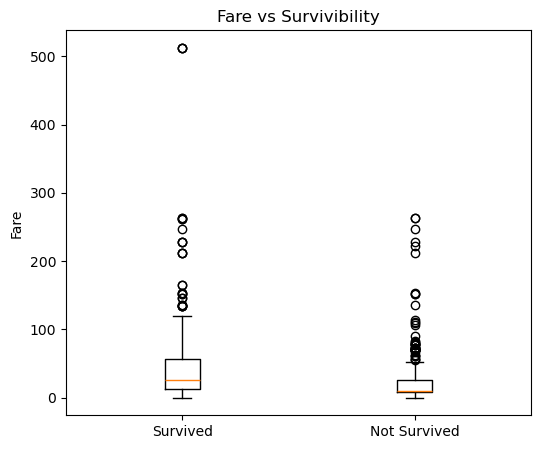

In [66]:
plt.figure(figsize=(6, 5))
plt.boxplot([fare_survived, fare_died], tick_labels = ['Survived', 'Not Survived'])
plt.title("Fare vs Survivibility")
plt.ylabel("Fare")
plt.show()

## Survival vs. Sex

In the original dataset, `Sex` is a string feature. In order to use it for ML analysis, we need to convert it into a numerical feature. Thankfully, it is a binary variable, so we can simply assign `0` to `male` and `1` to `female`:

In [67]:
# Convert sex to ints
def str_to_int(val):
    if val == 'male':
        return 0
    elif val == 'female':
        return 1
    else:
        return None
titanic_df['Sex'] = titanic_df['Sex'].apply(str_to_int)

Now we can perform the rest of our exploratory data analysis:

Sex         0    1
Survived          
0         468   81
1         109  233


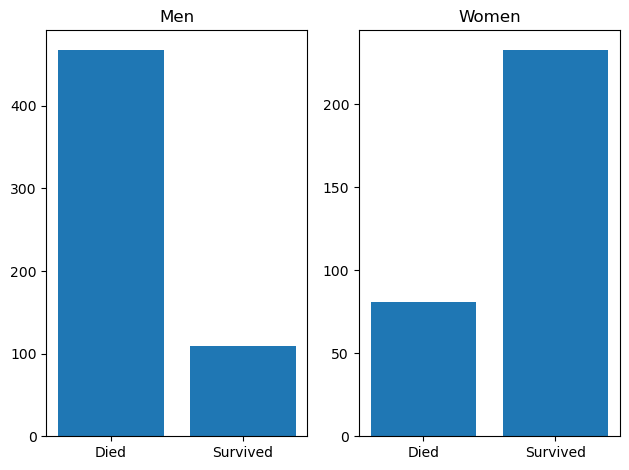

In [68]:
contingency = pd.crosstab(titanic_df['Survived'], titanic_df['Sex'])
print(contingency)
fig, (a1, a2) = plt.subplots(1, 2)
a1.bar(['Died', 'Survived'], contingency[0])
a1.set_title("Men")
a2.bar(['Died', 'Survived'], contingency[1])
a2.set_title("Women")
fig.tight_layout()

The easiest test we can perform here is a simple chi-squared test. However, because our table is so small (2x2), we need to apply Yate's correction for continuity, which brings each observation 0.5 closer to the expected frequency before squaring when it computes the chi-squared test statistic. Thankfully, Scipy automatically detects and performs this correction for us:

In [69]:
chi2 = stats.chi2_contingency(contingency)
print("Chi-squared test with Yate's correction for continuity:")
print(f"Chi-squared test statistic: {chi2.statistic: .4g}")
print(f"p-value: {chi2.pvalue: .4g}")

Chi-squared test with Yate's correction for continuity:
Chi-squared test statistic:  260.7
p-value:  1.197e-58


Our resulting p-value of $1.197 \cdot 10^{-58}$ is clearly less than our significance level of 0.05.

Because our sample size is so small, it's worth additionally performing Fisher's exact test, a statistical test usually reserved for small contingency tables known for being particularly conservative regarding the p-value:

In [70]:
fisher_exact_result = stats.fisher_exact(contingency, alternative="two-sided")
print("Fisher's exact test:")
print(f"Prior odds ratio: {fisher_exact_result.statistic:.4g}")
print(f"P-value: {fisher_exact_result.pvalue: .4g}")

Fisher's exact test:
Prior odds ratio: 12.35
P-value:  6.464e-60


Note that, even using Fisher's exact test, we still obtain a p-value of $6.464 \cdot 10^{-60}$ significantly below our significance level of 0.05. There is clearly substantial evidence that the distribution of passengers who survived vs. died is not the same between men and women on the Titanic, which makes sense as women and children were given priority when boarding lifeboats.


## Survival vs. # siblings/spouses

In [71]:
sibsp_table = pd.crosstab(titanic_df['SibSp'], titanic_df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(sibsp_table)
print("SibSp vs Survived")
print(f"Chi2: {chi2:.4g}", f"p-value: {p:.4g}")
print("Contingency Table:\n", sibsp_table, "\n")


SibSp vs Survived
Chi2: 37.27 p-value: 1.559e-06
Contingency Table:
 Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0 



From the contingency table, we see that there is a statistically significant relationship between the number of siblings/spouses aboard and survival outcome. Passengers with less siblings and spouses (SibSp is lower) had a lower chance of dying and higher chance of surviving compared to those with larger families. The Chi-squared test gives a p-value of approximately $1.56 \cdot 10^{-6}$, which is far below 0.05. This means we reject the null hypothesis and conclude that SibSp is significantly associated with survival on the Titanic. It makes sense logically, as passengers with very large families may have had more difficulty escaping in time.

## Survival vs. # parents/children

In [72]:
parch_table = pd.crosstab(titanic_df['Parch'], titanic_df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(parch_table)
print("Parch vs Survived")
print(f"Chi2: {chi2:.4g}", f"p-value: {p:.4g}")
print("Contingency Table:\n", parch_table, "\n")

Parch vs Survived
Chi2: 27.93 p-value: 9.704e-05
Contingency Table:
 Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0 



From the contingency table, we see that there is a statistically significant relationship between the number of parents/children aboard and survival outcome. Passengers traveling with fewer parents or children generally had a higher chance of surviving, whereas those with larger numbers of relatives were less likely to survive. The Chi-squared test gives a p-value of approximately $9.7 \cdot 10^{-5}$, which is below 0.05, so we reject the null hypothesis. This suggests that traveling with many dependents may have made it more difficult to escape in time, impacting survival.


## Survival vs. Age

`Age` has just under $20\%$ of its values missing. Normally, a proportion of missing values like this would call for some advanced imputation techniques, but due to the simple nature of our logistic regression model, we can get away with median imputation:

In [73]:
# Fill MCAR with single imputing (median)
titanic_df['Age'] = pd.to_numeric(titanic_df['Age'], errors='coerce').fillna(titanic_df['Age'].median())

We can now proceed with our exploratory data analysis:

In [74]:
age_survived = titanic_df[titanic_df["Survived"] == 1]["Age"]
age_not_survived = titanic_df[titanic_df["Survived"] == 0]["Age"]
# displaying summary statistics for both group
print("----- Survived ----- ")
print(age_survived.describe())
print("\n\n----- Not Survived ----- ")
print(age_not_survived.describe())

----- Survived ----- 
count    342.000000
mean      28.291433
std       13.764425
min        0.420000
25%       21.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


----- Not Survived ----- 
count    549.000000
mean      30.028233
std       12.499986
min        1.000000
25%       23.000000
50%       28.000000
75%       35.000000
max       74.000000
Name: Age, dtype: float64


H0: There is no meaningful difference between ages of those that survived and those that didn't.

HA: There is a meaningful difference between ages of those that survived and those that didn't.

In [75]:
# unpaired t-test
t_stat, p_value = stats.ttest_ind(age_survived, age_not_survived, equal_var=False, alternative = 'two-sided')
print(f"unpaired_t test p_value: {p_value:.4g}")
# mann-whitney u test
u, p_value = stats.mannwhitneyu(fare_survived, age_not_survived, alternative='two-sided')
print(f"mann-whitney u p value: {p_value:.4g}")

unpaired_t test p_value: 0.05831
mann-whitney u p value: 0.03985


The Mann-Whitney test gave a p-value of $3.99 \cdot 10^{-2}$, which is under our significance level of .05. We reject the null hypothesis, suggesting statistically significant differences between the age distributions of survivors vs non-survivors.
However, the t-test had a p-value of $5.83 \cdot 10^{-2}$, which is over our significance level of .05, meaning we fail to reject the null hypothesis. This suggests that there is no statistical significance between the mean ages of those who survived and those who didn't
So, the averages may be similar, but the distributions of survivors' vs. non-survivors' age is different. We reject the null hypothesis based on the Mann-Whitney U test, but fail to reject it based on the t-test.

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot([age_survived, age_not_survived], tick_labels = ['Survived', 'Not Survived'])
plt.title("Age vs Survivability")
plt.ylabel("Age")
plt.show()

## Survival vs. port of embarcation

In [ ]:
cont = pd.crosstab(titanic_df['Embarked'], titanic_df['Survived'])
print(cont)
chi2, p, dof, expected = stats.chi2_contingency(cont)
print("Port of embarcation vs. Survived")
print(f"Chi2: {chi2:.4g}", f"p-value: {p:.4g}")

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217
Port of embarcation vs. Survived
Chi2: 26.49 p-value: 1.77e-06


As is clear from the contingency table and the chi-squared analysis, the port from which a passenger embarked does have an association with the survival rate of the passenger; specifically, the survival rate for a passenger who embarked from Southampton is much lower than the survival rate for a passenger from the other two ports.

There are three ports from which passengers embarked on the titanic: Cherbourg (`C`), Queenstown (`Q`), and Southampton (`S`). We need to convert this categorical feature to a numeric feature. Due to the nature of our logistic regression model, we decided that the best way to do this would be to change each port to the survival rate of all passengers from that port. Specifically, we would assign `~0.337` to `S`, `~0.389` to `Q`, and `0.554` to `C`.

# Model Selection

For our primary analysis, we have chosen to use a supervised classification model. Specifically, Logistic Regression to predict if a particular passenger survived based on their provided characteristics.

Our target variable, Survived, is a binary value. This means using regression for a continuous value wouldn’t fit because this target variable better aligns with a classification problem. An unsupervised approach, like clustering, would reveal certain patterns but would not answer the question of whether a passenger survived directly. So, with the existence of pre-labeled data for the outcome of each passenger, using a supervised classification approach makes the most sense.

There are several options for classification models, but logistic regression is a great fit for several reasons

- Models the probability of a binary event, such as survived or died. We are then able to tune the probability threshold to balance the number of fall positives vs. false negatives.
- Our exploratory data analysis shows several features that have strong relationships with whether a passenger survived or not. These include Passenger Class, Gender, and Age. Logistic regression can handle multiple encoded categorical variables and continuous values relatively well.
- Logistic regression is very interpretable and allows us to both classify passengers and also understand the underlying factors that contribute to survivability.

These reasons make logistic regression an appropriate option to solve our classification problem.



# Training Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

embarked_survival = titanic_df.groupby('Embarked')['Survived'].mean()
titanic_df['Embarked'] = titanic_df['Embarked'].map(embarked_survival)
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].median())
X = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Accuracy: 0.810
Precision: 0.803
Recall: 0.716


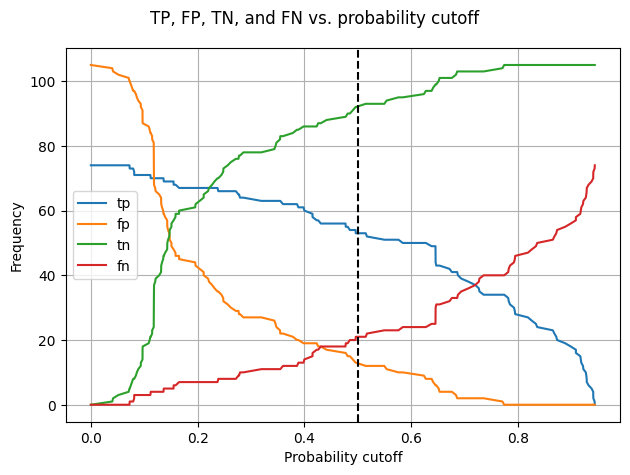

In [ ]:
confidence_scores = model.decision_function(X_test)
events = np.array(sorted([*zip(confidence_scores, y_test)]))
cutoff, tp, fp, tn, fn = [0], [0], [0], [0], [0]
for event in events:
    if event[1]:
        tp[0] += 1
    else:
        fp[0] += 1
def logistic(x):
    return 1 / (1 + np.exp(-x))
for event in events:
    cutoff.append(logistic(event[0]))
    if event[1]:
        tp.append(tp[-1] - 1)
        fn.append(fn[-1] + 1)
        fp.append(fp[-1])
        tn.append(tn[-1])
    else:
        fp.append(fp[-1] - 1)
        tn.append(tn[-1] + 1)
        tp.append(tp[-1])
        fn.append(fn[-1])
cutoff, tp, fp, tn, fn = np.array(cutoff), np.array(tp), np.array(fp), np.array(tn), np.array(fn)
fig, ax = plt.subplots()
ax.plot(cutoff, tp, label="tp")
ax.plot(cutoff, fp, label="fp")
ax.plot(cutoff, tn, label="tn")
ax.plot(cutoff, fn, label="fn")
ax.axvline(0.5, c = 'k', ls="--")
ax.set_xlabel("Probability cutoff")
ax.set_ylabel("Frequency")
fig.suptitle("TP, FP, TN, and FN vs. probability cutoff")
ax.grid()
ax.legend()
fig.tight_layout()

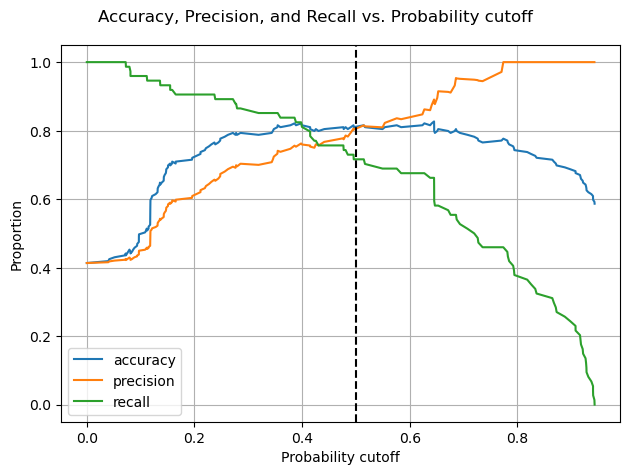

In [58]:
accuracy = (tp + tn) / len(X_test)
precision = tp[:-1] / (tp[:-1] + fp[:-1]) # quick workaround to avoid divide by zero warning
recall = tp / (tp + fn)
fig, ax = plt.subplots()
ax.plot(cutoff, accuracy, label="accuracy")
ax.plot(cutoff[:-1], precision, label="precision")
ax.plot(cutoff, recall, label="recall")
ax.axvline(0.5, c = 'k', ls="--")
ax.set_xlabel("Probability cutoff")
ax.set_ylabel("Proportion")
fig.suptitle("Accuracy, Precision, and Recall vs. Probability cutoff")
ax.grid()
ax.legend()
fig.tight_layout()

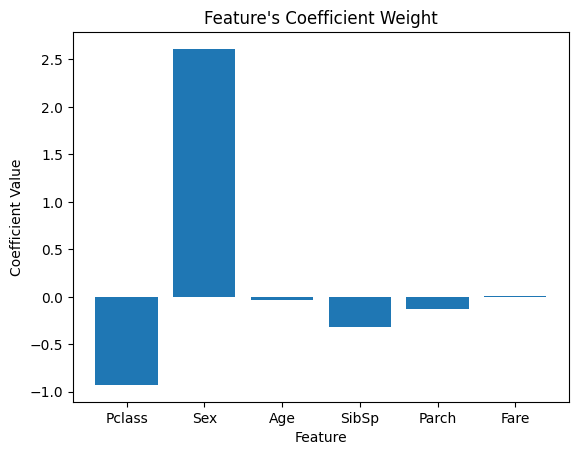

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

feature_names = X.columns
coeffs = model.coef_[0]
coeff_data = []

for i in range(len(feature_names)):
    coeff_data.append({'Feature': feature_names[i],'Coeff': coeffs[i]})

importance_df = pd.DataFrame(coeff_data)
plt.bar(importance_df['Feature'], importance_df['Coeff'])
plt.title("Feature's Coefficient Weight")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.show()

The feature importance graph shows that sex is the strongest predictor of survival, followed by passenger class. This aligns with historical accounts because women and 1st class passengers were much more likely to survive since they were given priority. It also makes sense that passenger class has a negative coefficient because as class number increases from 1st to 3rd class, the probability of survival decreases.

# K-Fold Cross Validation
In order to gain a better understanding of model performance with different arrangements of data, we can use k-fold cross-validation.



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Perform k=5 k-fold cross validation
k = 5
kfold = KFold(n_splits = k, shuffle = True, random_state=42)
scores = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")

# Display accuracy and mean scores
print(f"Accuracy of folds: {scores}")

avg_acc = np.mean(scores)
print(f"Average Accuracy: {avg_acc:.2f}")

Accuracy of folds: [0.81005587 0.78089888 0.83146067 0.76966292 0.7752809 ]
Average Accuracy: 0.79



Our first model that used a single train/test split has an accuracy of 0.804. A more reliable estimate can be found by found by using k-fold cross validation. The mean accuracy when k=5 was 0.79, which is extremely close to the original model's accuracy of 0.804.

This small difference suggests the initial model, while slightly better, is within performance expectations for the real world. Additional model complexity is likely unneeded since performance gains would be marginal. These results show the model already generalizes well.

# Insight and Conclusion

Based on the weights of the model of 81% accuracy, it's clear that sex (gender) is the most accurate predictor of the surviability of a passenger boarding Titanic. Since 'female' was encoded as 1 and 'male' was encoded as 0, the postive weight of 2.61 indicates that prominance in the surviviability of women. The second most accurate predictor is the Passenger class with weight of -0.93. Note, the negative weight predicts that as the class label gets lower, the chance of surviality increases.
On the contrary, age and fair is the least accurate predictor of the surviability of Titanic pessager, weight value of -0.03 and 0.003 respectively. This means, neither age or fair has signifncant impact on the surviability, considering sex and class.  

The analysis shows that sex and boarding class is the strongest predictors of the Titanic passenger surviability, while age and fair has the lowest effects. This heavily reflects that the survivial of the pessagnes was heavily influenced both by social norms and socioeconomic status. Women having the high survivability indicates the contemporary social norm of protecting women, embodieing the famous "women and children first" evacuation policy. However, age being a weak predictor contradicts the "children first policy" as more than 100 were under the age of 18.
It is important to note that fair isn't a causal factor because it only reflects the passenger class, whcih is a causal factor. The surviability of the higher-class pessangers not only protrays easier access to lifeboats due to the location of their cabins but also highlights the contemporary divisions of social classes regarding priviliges.